# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [5]:
df_auto = pd.read_csv('auto-mpg.csv')

In [6]:
df_auto.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
df_auto.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

In [8]:
df_auto.shape

(398, 10)

In [9]:
df_auto.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [12]:
df_auto.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [13]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [14]:
df_auto.corr()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.759207
cyl,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.912577
disp,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.855141
wt,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.815445
acc,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.385187
yr,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.305194
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.572691
car_type,0.759207,-0.912577,-0.855141,-0.815445,0.385187,0.305194,0.572691,1.000000


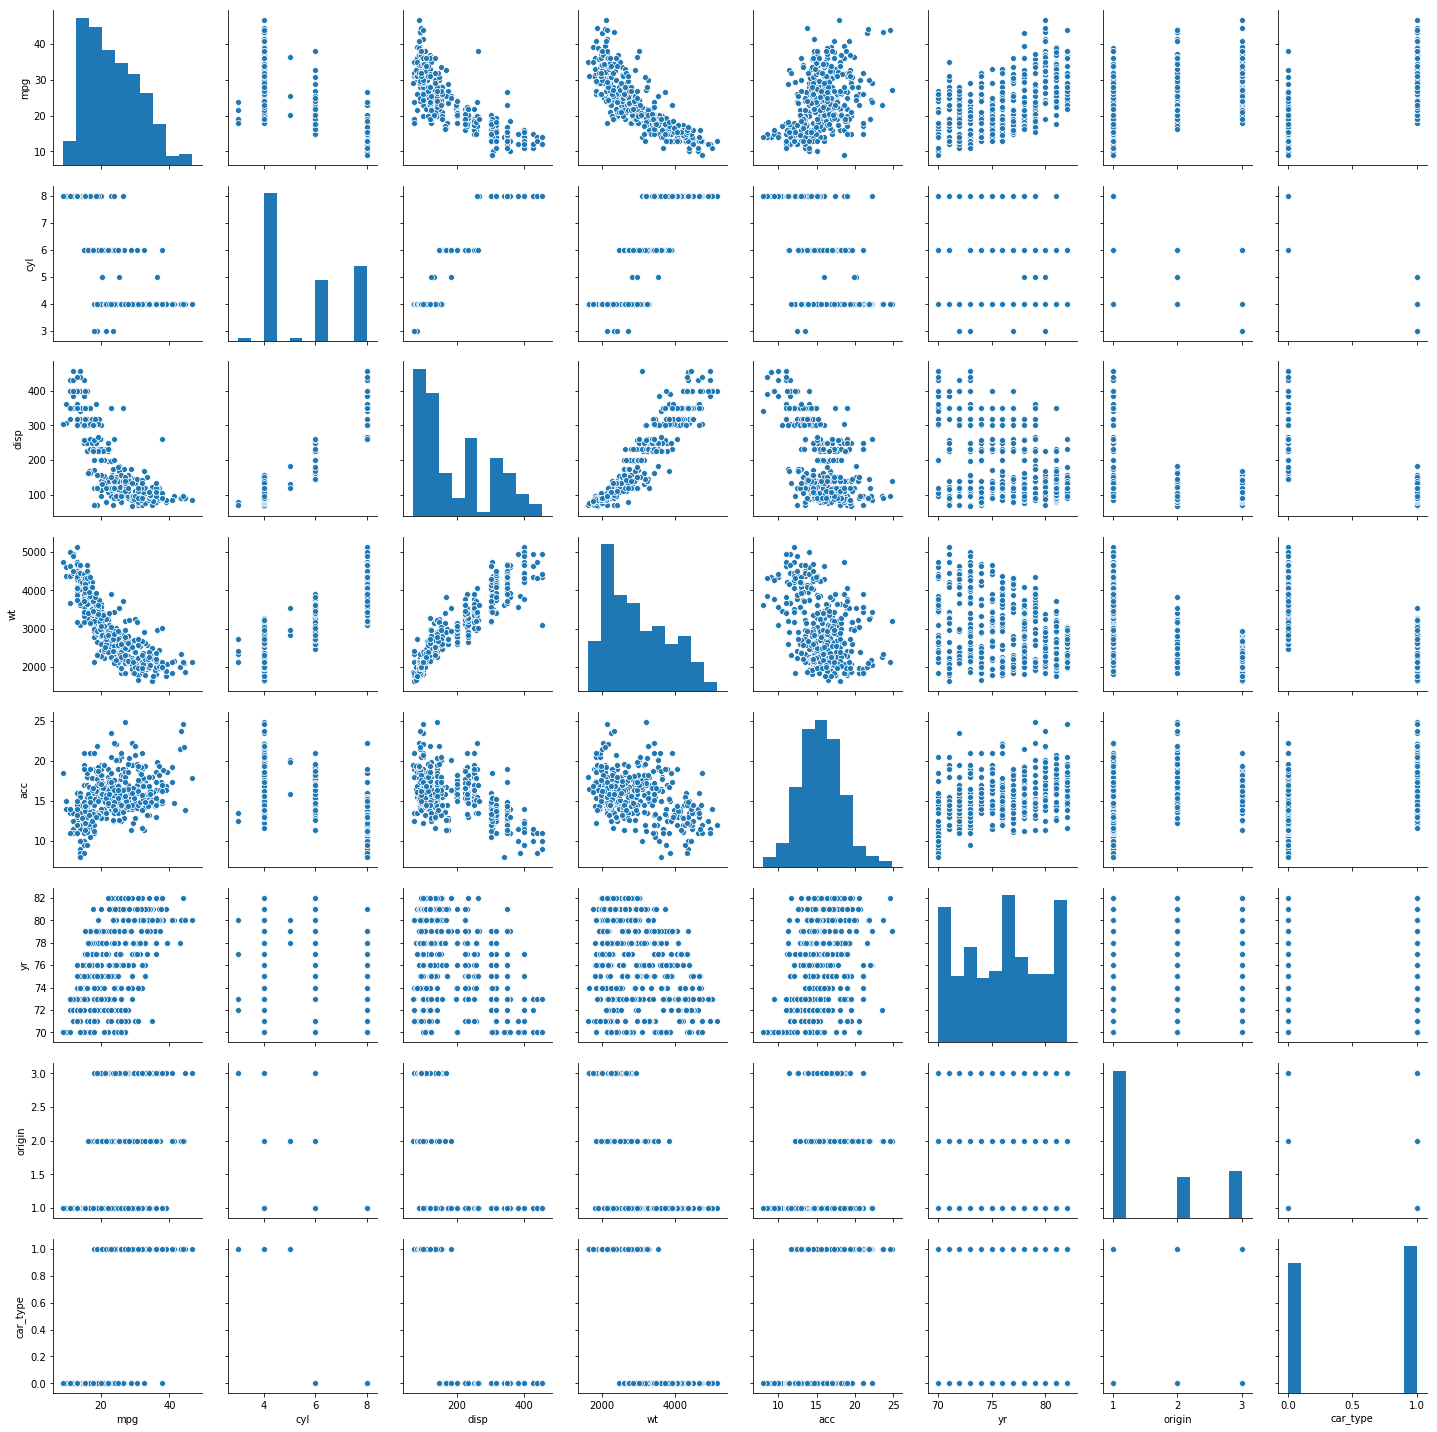

In [16]:
sns.pairplot(df_auto)

MPG shows improvement with each model year.
MPG shows improvement with each model year.

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [17]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


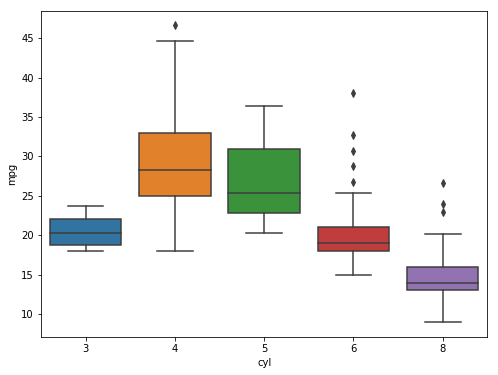

In [18]:
df1 = df_auto[['mpg','cyl']]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="cyl", y="mpg", data=df_auto)

In [21]:
df_auto.origin.unique()
df_auto.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [23]:
origin1 = pd.get_dummies(df_auto['origin'],drop_first=True)

In [24]:
car_df_auto = pd.concat([df_auto,origin1],axis=1)

In [141]:
df_auto.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [25]:
df_auto['yr'] = 83 - df_auto['yr']

In [26]:
df_auto.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,13,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,13,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,13,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,13,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,13,1,0,ford torino


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stdsclr_df =  sc.fit_transform(df1)

In [29]:
df2 = pd.DataFrame(stdsclr_df)
df2.describe()

,0,1
count,3.980000e+02,3.980000e+02
mean,2.761610e-16,-5.171742e-16
std,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.444949e+00
25%,-7.704907e-01,-8.563206e-01
50%,-6.591883e-02,-8.563206e-01
75%,7.027050e-01,1.498191e+00
max,2.957335e+00,1.498191e+00


In [30]:
df2.head()

,0,1
0,-0.706439,1.498191
1,-1.090751,1.498191
2,-0.706439,1.498191
3,-0.962647,1.498191
4,-0.834543,1.498191


# Q7. Create appropriate clusters with the new data set

In [32]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 8)   # we have observed 3 - 4 clusters from pairplot hnce we provided 2 to 8 as a cluster range
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 8)
  clusters.fit(df2)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,223.149506
1,3,142.161347
2,4,67.379405
3,5,49.651986
4,6,41.655179
5,7,33.656727


# Q8. Identify the appropriate clusters with result from above question

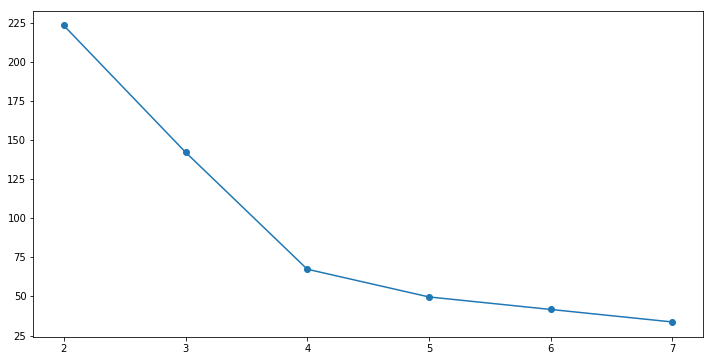

In [33]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q9. Check for no of values in each cluster and centers for each variables. 

In [34]:
cluster = KMeans( n_clusters = 4, random_state = 100 )
cluster.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [35]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.23402462, -0.87011654],
       [-1.11009181,  1.49819126],
       [-0.5053309 ,  0.32802725],
       [ 1.47313739, -0.80784533]])

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [36]:
centroid_df = pd.DataFrame(centroids, columns = list(df2) )
centroid_df

,0,1
0,0.234025,-0.870117
1,-1.110092,1.498191
2,-0.505331,0.328027
3,1.473137,-0.807845


In [37]:
prediction=cluster.predict(df2)
df2["GRP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C753BFB898>,
      dtype=object)

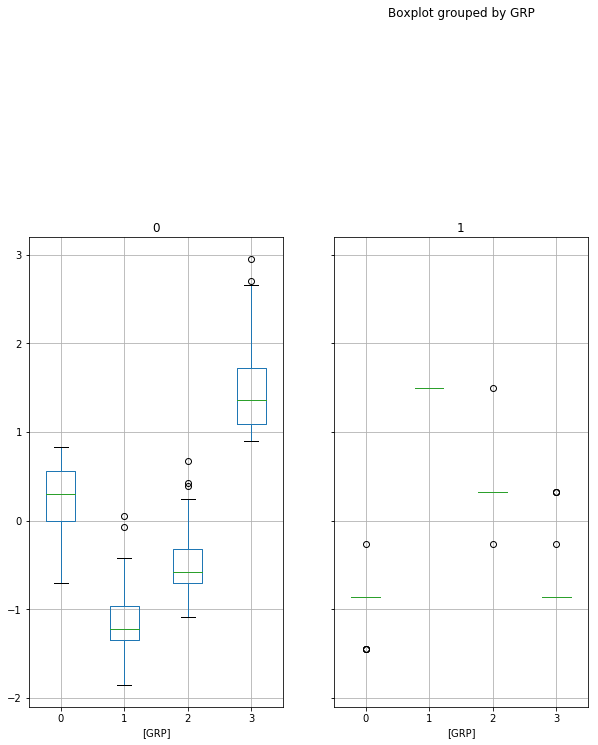

In [38]:
df2.boxplot(by = 'GRP',  layout=(4,3), figsize=(15, 40))

In [43]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('C:\\Users\\VBALAJE\\cluster_file.xls')
car_df_auto.to_excel(writer,'Sheet1')
writer.save()